<a href="https://colab.research.google.com/github/pranaya-mathur/Deep-Learning-Projects/blob/master/Facial_Key_Point_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Exploration

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [0]:
seed = 42
rng = np.random.RandomState(seed)

In [2]:
!curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-datasets/64052/125245/facial-key.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1563223567&Signature=U2Rah%2BCyc%2Bj4CJVWGYC9FmfU1uMnQ%2FfNWnPL1LsOmZifqWMOjFfVI9pfUDdPuqKawsWZi0pWCcX5WeL502xZNKHG9bUTyuVj8%2BWpJ90cjgqJegpLPwo3xNP3W34rLg2x87mNwI%2Flf6kacBvEWsYhvYJIpLoHiZXlfdSyltoinqlNx9dS8mSqJ99EG185Zt5Gk2p004Ip9hxUInT760PdvbQtGk3uHzaQz70w5KsiaqpiFHyqlTaOEW9Dn1p54p5t2u3ZgMVbDhAvmbAQem4I6xNz52S4%2B5he1xtf3Yt1oARj206BJTrz2fg3%2FCLAwNGfzQNvC3nriMrQG00iGb92xg%3D%3D' --output 'facial-key.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.2M  100 29.2M    0     0  32.3M      0 --:--:-- --:--:-- --:--:-- 32.2M


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('facial-key.zip', 'r')
zip_ref.extractall("data")
zip_ref.close()


In [0]:
data = pd.read_csv('data/facial_keypoint_identification/facial_keypoint_identification.csv')

In [9]:
data.head()

,image_name,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y
0,0.jpg,66,39,30,36
1,1.jpg,64,34,29,33
2,2.jpg,65,34,30,34
3,3.jpg,65,37,32,37
4,4.jpg,66,39,32,38


Shape of original image is (96, 96, 3)


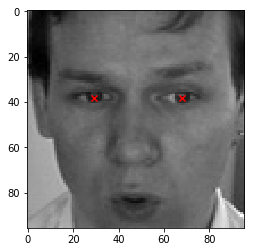

In [10]:
# get random index of data
idx = rng.choice(data.index)

# read image
img = plt.imread('data/facial_keypoint_identification/images/' + data.image_name.iloc[idx])

# create an empty figure to plot the image and target
fig = plt.figure()

# plot image
plt.imshow(img)

# plot target
plt.scatter(data.left_eye_center_x.iloc[idx], data.left_eye_center_y.iloc[idx], marker='x', c='r')
plt.scatter(data.right_eye_center_x.iloc[idx], data.right_eye_center_y.iloc[idx], marker='x', c='r')

# and print the shape of image
print('Shape of original image is', img.shape)

# finally show the figure
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [12]:
error_left_x = mean_squared_error(data.left_eye_center_x.values, np.full(data.left_eye_center_x.values.shape, data.left_eye_center_x.mean()))
error_left_y = mean_squared_error(data.left_eye_center_y.values, np.full(data.left_eye_center_y.values.shape, data.left_eye_center_y.mean()))
error_right_x = mean_squared_error(data.right_eye_center_x.values, np.full(data.right_eye_center_x.values.shape, data.right_eye_center_x.mean()))
error_right_y = mean_squared_error(data.right_eye_center_y.values, np.full(data.right_eye_center_y.values.shape, data.right_eye_center_y.mean()))

error = (error_left_x*error_left_x + error_left_y*error_left_y + error_right_x*error_right_x + error_right_y*error_right_y ) / 4
error

104.5789947402131

## 2. Data Loading and Preprocessing

In [13]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
images = []
for img in data.image_name:
    img = image.load_img('data/facial_keypoint_identification/images/' + img, target_size=(224, 224, 3))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [16]:
images.shape

(7033, 224, 224, 3)

In [0]:
X=preprocess_input(images, mode='tf')
y = data.iloc[:, 1:].values

In [0]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X,y,test_size=0.3, random_state=42)

## 3. Model Building

In [0]:
from keras.applications.vgg16 import VGG16

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, InputLayer
from keras.callbacks import EarlyStopping

In [20]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

W0712 20:51:09.294125 140272655267712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 20:51:09.331834 140272655267712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 20:51:09.338847 140272655267712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 20:51:09.378549 140272655267712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 1s 0us/step


W0712 20:51:10.399283 140272655267712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 20:51:10.400751 140272655267712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
# Extracting features

features_train = base_model.predict(X_train)
features_valid = base_model.predict(X_valid)

In [22]:
features_train.max()

10.810992

In [0]:
max_val = features_train.max()

In [0]:
features_train /= max_val
features_valid /= max_val

In [0]:
features_train = features_train.reshape(features_train.shape[0], 7*7*512)
features_valid = features_valid.reshape(features_valid.shape[0], 7*7*512)

In [26]:
model=Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation='linear'))

adam = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=adam)

W0712 20:52:23.945881 140272655267712 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0712 20:52:23.988918 140272655267712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
estop = EarlyStopping(patience=10, mode='min', min_delta=0.001, monitor='val_loss')

In [28]:
model.fit(features_train, Y_train, epochs=200, batch_size=512, callbacks=[estop] ,validation_data=(features_valid,Y_valid))

Train on 4923 samples, validate on 2110 samples
Epoch 1/200
4923/4923 [==============================] - 3s 567us/step - loss: 1121.2657 - val_loss: 148.9870
Epoch 2/200
4923/4923 [==============================] - 1s 154us/step - loss: 142.3511 - val_loss: 167.4066
Epoch 3/200
4923/4923 [==============================] - 1s 146us/step - loss: 91.2469 - val_loss: 54.3718
Epoch 4/200
4923/4923 [==============================] - 1s 145us/step - loss: 55.3768 - val_loss: 34.5272
Epoch 5/200
4923/4923 [==============================] - 1s 143us/step - loss: 34.7124 - val_loss: 24.4463
Epoch 6/200
4923/4923 [==============================] - 1s 143us/step - loss: 28.5424 - val_loss: 18.9676
Epoch 7/200
4923/4923 [==============================] - 1s 144us/step - loss: 23.5424 - val_loss: 16.6473
Epoch 8/200
4923/4923 [==============================] - 1s 144us/step - loss: 21.3292 - val_loss: 14.9615
Epoch 9/200
4923/4923 [==============================] - 1s 145us/step - loss: 19.6904 - va

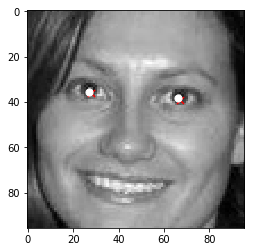

In [30]:
# get predictions
predictions = model.predict(features_valid)

# extract validation images
_, valid_images, _, _ = train_test_split(data.image_name,y,test_size=0.3, random_state=42)

# get random validation image index
idx = rng.choice(range(len(valid_images)))

# get the corresponding image name
image_name = valid_images.iloc[idx]

# get the actual targets
left_eye_center_x = data.loc[data.image_name == image_name, 'left_eye_center_x']
left_eye_center_y = data.loc[data.image_name == image_name, 'left_eye_center_y']
right_eye_center_x = data.loc[data.image_name == image_name, 'right_eye_center_x']
right_eye_center_y = data.loc[data.image_name == image_name, 'right_eye_center_y']

# get the corresponding predictions
predicted_left_eye_center_x, predicted_left_eye_center_y, predicted_right_eye_center_x, predicted_right_eye_center_y = predictions[idx]

# read the image
img = plt.imread('data/facial_keypoint_identification/images/' + image_name)

# plot empty figure
fig = plt.figure()

# plot image
plt.imshow(img,cmap='gray')

# plot actual targets
plt.scatter(left_eye_center_x, left_eye_center_y, marker='x', s=50, c='r')
plt.scatter(right_eye_center_x, right_eye_center_y, marker='x', s=50, c='r')

# plot predictions
plt.scatter(predicted_left_eye_center_x, predicted_left_eye_center_y, marker='o', s=50, c='w')
plt.scatter(predicted_right_eye_center_x, predicted_right_eye_center_y, marker='o', s=50, c='w')

# show the figure
plt.show()